<a href="https://colab.research.google.com/github/Twist-tracer/gb-python-libs/blob/master/lesson6/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Раздел 1

In [1]:
import numpy as np
import pandas as pd

**Работа со встроенными наборами данных в scikit-learn**

Набор данных Boston House Prices

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Данные о недвижимости

In [5]:
data = boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
data.shape

(506, 13)

In [7]:
target = boston.target # Величина, которую нужно предсказать

Названия признаков

In [8]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
for line in boston.DESCR.split("\n"):
  print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
y = pd.DataFrame(target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


**Разбиение данный на тренировочный и тестовый датасеты**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Построение модели линейной регрессии**

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Задача линейной регрессии - найти подходящие коэффициенты w

при признаках x для вычесление целевой переменной y

минимизируя ошибку e:



$y = w_0 + w_1 * x_1 + w_2 * x_2+...+w_m * x_m + e$

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
check_test = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten()
}, columns=['y_test', 'y_pred'])
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


**Метрики оценки качесвта регрессионных меоделей**

Средняя квадратичная ошибка

In [18]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [19]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [20]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

22.098694827098274

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098274

Средняя абсолютная ошибка

In [23]:
(np.abs(check_test['error'])).mean()

3.060939595437068

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.060939595437068

$R^2$

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.684426728352709

**Просмотр коэффициентов линейной регрессии**

$w_0$

In [26]:
lr.intercept_

array([29.83642016])

$w1...wm$

In [27]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='svg'

Text(0, 0.5, 'Признак')

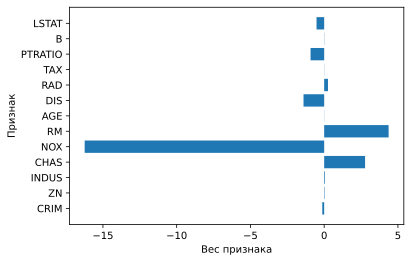

In [29]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [30]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Стандартизация признаков**

При стандартизации от признака нужно отнять среднее и поделить на среднеквадратичное отклонение:

$X_scaled = \frac{x-x_mean}{o_x}$

Применим стандартизацию

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

Text(0, 0.5, 'Признак')

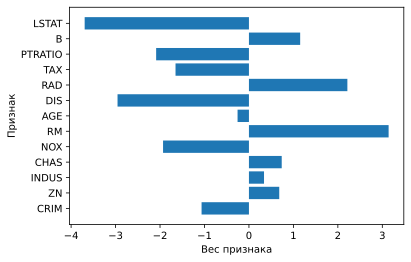

In [36]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [37]:
feats = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [38]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred=model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [39]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

22.098694827097976

In [40]:
# Сверяем с исходной ошибкой
initial_mse

22.098694827098274

**Модели линейной регрессии с регуляризацией**

In [41]:
from sklearn.linear_model import Lasso, Ridge

Lasso (линейная регрессия с L1-регуляризацией)

In [42]:
# Параметр alpha отвечает за регуляризацию
model = Lasso(alpha=0.003)

In [43]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

22.10273568798449

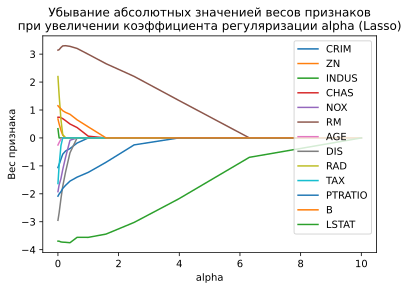

In [44]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значенией весов признаков\nпри увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

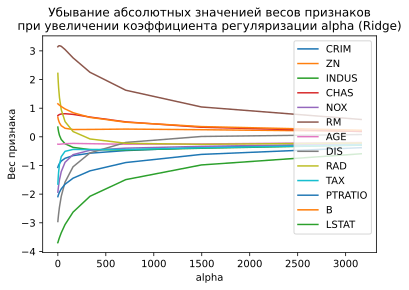

In [45]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    lasso = Ridge(alpha = val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значенией весов признаков\nпри увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

# Раздел 2

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Логистическа регрессия**

Логистическая регрессия используется для задач классификаии, при этом вычисляется вероятность принадлеждности события к поределенному классу.

Задача алгоритма логистической регресси - найти подходящии коэффициенты w при признаках x:

$z = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$

Величина z помещается в сигмоидную функцию для вычесления вероятности:

$f(x) = \frac{1}{1+e_-z}$

Значение f(x) будет расположено на отрезке [0,1].

f(x) - вероятность отнесения события к классу 1,

1 - f(x) - вероятность отнесения события к классу 0

**Log loss**

Алгоритм логистической регрессии минимизирует величину logloss:

$logloss = -y * ln(p) - (1 - y) * ln(1 - p)$

где y - истинное значение (0 или 1),

p - вычесленная алгоритмом вероятность того, что событие принадлежит классу 1

**Titanic**

Для изучения классификации мы будем использовать датасет с информацией о пассажирах **Titanic** с сайта Kaggle.com

Ссылка: https://www.kaggle.com/c/titanic/data

Нам понадобится файл под названием train.csv который мы поместим в папку input:

In [47]:
data = pd.read_csv('data/sets/titanic_train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Наша задача - определить, выэил ли человек при крушении Титаника

В поле Survived выыжившие пасажиры обозначены еденицей, а утонувшие - нулём

In [50]:
target = 'Survived'

In [51]:
y = data[target]

In [52]:
x = data.drop(target, axis=1)

**Изучение качества данных и их очистка**

In [53]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


В поле Cabin слишком много пропущенных значений, в этом уроке мы не будем его использовать.

Столбцы Name и Ticket также в этот раз не рассматриваем

Удалим эти поля

In [54]:
x = x.drop(['Cabin', 'Name', 'Ticket'], axis=1)

В поле возраст 20% значений не заполнено. Заменим пропущенные значения среднего возраста

In [55]:
mean_age = x['Age'].mean()
mean_age

29.69911764705882

In [56]:
x['Age'] = x['Age'].fillna(mean_age)
x['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

В поле Embarked, которое является текстовым, не хватает двух значнеий, заполним пропущенные значения наиболее часто встречающимися значением (мода)

In [57]:
x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
embarked_mode = x['Embarked'].mode()[0]
embarked_mode

'S'

In [59]:
x['Embarked'] = x['Embarked'].fillna(embarked_mode)

In [60]:
x['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


**Работа с категориальными признаками**

Признак пола пассажира (Sex) - категориальная переменная. ТАк как в ней два класса, то мы можем представить одной колонкой со значениями 0 и 1

In [62]:
x['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
x['Sex'] = (x['Sex'] == 'female').astype(int)
x['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

Еще одна категориальная переменная - Embarke. Преобразуем ее значения в dummy-переменные. Теперь каждому ее значению будет отведен отдельный столбец, в котором возможны два числа:

1 - переменная равна данному значению

0 - переменная не равна данному значению

In [64]:
x = pd.get_dummies(x)
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [66]:
x['Pclass'].unique()

array([3, 1, 2])

In [67]:
x['Pclass'] = x['Pclass'].astype('category')

In [68]:
x = pd.get_dummies(x)

In [69]:
x.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [70]:
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [71]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

**Построение модели**

In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(x_train, y_train)

LogisticRegression()

In [75]:
y_pred = lr.predict(x_valid)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

Метрика Accuracy (доля правильных ответов)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

Можно сравнить с Accuracy на тренировочном датасете

In [78]:
y_pred_train = lr.predict(x_train)

In [79]:
accuracy_score(y_train, y_pred_train)

0.8083832335329342

**Вычисление вероятности событий**

In [80]:
y_proba = lr.predict_proba(x_valid)

In [81]:
y_proba # Вероятности событий 0 и 1 для кадого пассажира

array([[0.88803845, 0.11196155],
       [0.73069939, 0.26930061],
       [0.87015655, 0.12984345],
       [0.08991939, 0.91008061],
       [0.25062021, 0.74937979],
       [0.0782631 , 0.9217369 ],
       [0.33446964, 0.66553036],
       [0.90522443, 0.09477557],
       [0.24542486, 0.75457514],
       [0.10340603, 0.89659397],
       [0.69433676, 0.30566324],
       [0.9348721 , 0.0651279 ],
       [0.62484697, 0.37515303],
       [0.84761361, 0.15238639],
       [0.75859305, 0.24140695],
       [0.07898048, 0.92101952],
       [0.72748703, 0.27251297],
       [0.33438497, 0.66561503],
       [0.70247547, 0.29752453],
       [0.70651159, 0.29348841],
       [0.88386347, 0.11613653],
       [0.64286512, 0.35713488],
       [0.39821926, 0.60178074],
       [0.86944944, 0.13055056],
       [0.89833288, 0.10166712],
       [0.92821101, 0.07178899],
       [0.56597441, 0.43402559],
       [0.72832998, 0.27167002],
       [0.9144287 , 0.0855713 ],
       [0.42638412, 0.57361588],
       [0.

In [82]:
x_train.to_pickle('data/models/x_train.pkl')
y_train.to_pickle('data/models/y_train.pkl')

x_valid.to_pickle('data/models/x_valid.pkl')
y_valid.to_pickle('data/models/y_valid.pkl')

# Раздел 3

In [83]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

In [84]:
x_train = pd.read_pickle('data/models/x_train.pkl')
y_train = pd.read_pickle('data/models/y_train.pkl')

x_valid = pd.read_pickle('data/models/x_valid.pkl')
y_valid = pd.read_pickle('data/models/y_valid.pkl')

**Нормализация признаков**

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0
317,1,24.000000,1,0,26.0000,0,0,1,0,1,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
406,0,34.000000,1,0,21.0000,0,0,1,0,1,0
743,1,21.000000,2,2,262.3750,1,0,0,1,0,0


In [88]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare'] # названия ненормализованных признаков

In [90]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [91]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0
317,1,0.296306,0.125,0.000000,0.050749,0,0,1,0,1,0
3,1,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1
406,0,0.421965,0.125,0.000000,0.040989,0,0,1,0,1,0
743,1,0.258608,0.250,0.333333,0.512122,1,0,0,1,0,0


In [92]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

In [94]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


 **Сохранение и загрузка модели нормализации**

In [95]:
import joblib

In [96]:
joblib.dump(scaler, 'data/models/min_max_scaler.pkl')

['data/models/min_max_scaler.pkl']

In [97]:
scaler = joblib.load('data/models/min_max_scaler.pkl')

**SVC**

In [98]:
clf = SVC()

In [99]:
clf.fit(x_train, y_train)

SVC()

In [100]:
y_pred = clf.predict(x_valid)

In [101]:
y_pred_train = clf.predict(x_train)

Оценим Accuracy

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_valid, y_pred)

0.8071748878923767

In [104]:
accuracy_score(y_train, y_pred_train)

0.8158682634730539

**Тюнинг модели SVC**

In [105]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [106]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val}\nacc_valid = {acc_valid}\nacc_train = {acc_train}\n')

C = 0.01
acc_valid = 0.600896860986547
acc_train = 0.6212574850299402

C = 0.01778279410038923
acc_valid = 0.600896860986547
acc_train = 0.6212574850299402

C = 0.03162277660168379
acc_valid = 0.7802690582959642
acc_train = 0.7889221556886228

C = 0.05623413251903491
acc_valid = 0.7847533632286996
acc_train = 0.7979041916167665

C = 0.1
acc_valid = 0.8071748878923767
acc_train = 0.812874251497006

C = 0.1778279410038923
acc_valid = 0.8071748878923767
acc_train = 0.812874251497006

C = 0.31622776601683794
acc_valid = 0.8071748878923767
acc_train = 0.812874251497006

C = 0.5623413251903491
acc_valid = 0.8071748878923767
acc_train = 0.812874251497006

C = 1.0
acc_valid = 0.8071748878923767
acc_train = 0.8158682634730539

C = 1.7782794100389228
acc_valid = 0.8071748878923767
acc_train = 0.8158682634730539

C = 3.1622776601683795
acc_valid = 0.8116591928251121
acc_train = 0.8158682634730539

C = 5.623413251903491
acc_valid = 0.8161434977578476
acc_train = 0.8278443113772455

C = 10.0
acc_va

#  Раздел 4

In [107]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pylab

accuracy_score = metrics.accuracy_score
rcParams = pylab.rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
x_train = pd.read_pickle('data/models/x_train.pkl')
y_train = pd.read_pickle('data/models/y_train.pkl')

x_valid = pd.read_pickle('data/models/x_valid.pkl')
y_valid = pd.read_pickle('data/models/y_valid.pkl')

**Масштабирование признаков с использованием RobustScaler**

In [110]:
from sklearn.preprocessing import RobustScaler

In [111]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare'] # названия ненормализованных признаков

In [112]:
scaler = RobustScaler()

In [113]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [114]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.051358,0.430493,0.408072,0.791961,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.998803,0.801667,0.837912,1.930379,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,-2.220701,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.515317,0.000000,0.000000,-0.288115,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.037466,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.484683,1.000000,1.000000,0.750000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.176991,4.000000,5.000000,10.984496,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


**Классификация с помощью KNN**

In [116]:
k_vals = np.arange(2, 10)

In [117]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'n_neighbors = {val}\nacc_valid = {acc_valid}\nacc_train = {acc_train}\n')

n_neighbors = 2
acc_valid = 0.7937219730941704
acc_train = 0.8772455089820359

n_neighbors = 3
acc_valid = 0.8161434977578476
acc_train = 0.875748502994012

n_neighbors = 4
acc_valid = 0.7892376681614349
acc_train = 0.8458083832335329

n_neighbors = 5
acc_valid = 0.8071748878923767
acc_train = 0.8637724550898204

n_neighbors = 6
acc_valid = 0.8251121076233184
acc_train = 0.8353293413173652

n_neighbors = 7
acc_valid = 0.7847533632286996
acc_train = 0.8323353293413174

n_neighbors = 8
acc_valid = 0.7713004484304933
acc_train = 0.8173652694610778

n_neighbors = 9
acc_valid = 0.7802690582959642
acc_train = 0.8173652694610778



In [118]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.8251121076233184

**Точность и полнота**

In [119]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]])

In [122]:
# True Negative
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

In [123]:
# False Positive
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

In [124]:
# False Negative
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

In [125]:
# True Positive
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

In [126]:
# Normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

In [127]:
# Точность
Precision = TP / (TP + FP)
Precision

0.8472222222222222

In [128]:
from sklearn.metrics import precision_score

In [129]:
precision_score(y_valid, y_pred)

0.8472222222222222

In [130]:
# Полнота
Recall = TP / (TP + FN)
Recall

0.6853932584269663

In [131]:
from sklearn.metrics import recall_score

In [132]:
recall_score(y_valid, y_pred)

0.6853932584269663

In [133]:
# F1 score
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7577639751552795

In [134]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_pred)

0.7577639751552795